<a href="https://colab.research.google.com/github/aravindkrishna2008/ESG-Research-Paper/blob/main/Training_%2B_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas

In [ ]:
df = pandas.read_csv("./data (1).csv")

In [ ]:
df.head(3)

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,...,Depletion Income Statement,Duefrom Related Parties Non Current,Net Income Extraordinary,Taxes Refund Paid,Current Deferred Taxes Liabilities,Securities Amortization,Restricted Common Stock,Dividend Paid Cfo,Interest Received Cfo,Interest Paid Cfo
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,"18,000","Agilent Technologies, Inc. provides applicatio...",15.2,0.3,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,"132,500","American Airlines Group Inc., through its subs...",29.0,12.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,"40,000","Advance Auto Parts, Inc. provides automotive r...",11.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Address'] = df['Address'].str.split('\n', n=3).str[:3].str.join('\n')

In [ ]:
from geopy.geocoders import Nominatim
from tqdm import tqdm
import pandas as pd

# Initialize the geocoder
geolocator = Nominatim(user_agent="your_app_name")

# function to get coordinates from an address
def get_coordinates_lat(address):
  try:
    location = geolocator.geocode(address)
    if location:
        return location.latitude
    else:
        return None
  except:
    pass
def get_coordinates_long(address):
  try:
    location = geolocator.geocode(address)
    if location:
        return location.latitude
    else:
        return None
  except:
    pass

# df['Latitude'] = df['Address'].progress_apply(get_coordinates_lat)
# df['Longitude'] = df['Address'].progress_apply(get_coordinates_long)

In [ ]:
df

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,...,Net Income Extraordinary,Taxes Refund Paid,Current Deferred Taxes Liabilities,Securities Amortization,Restricted Common Stock,Dividend Paid Cfo,Interest Received Cfo,Interest Paid Cfo,Latitude,Longitude
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,"18,000","Agilent Technologies, Inc. provides applicatio...",15.2,0.3,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,"132,500","American Airlines Group Inc., through its subs...",29.0,12.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.825479,32.825479
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,"40,000","Advance Auto Parts, Inc. provides automotive r...",11.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.835851,35.835851
3,AAPL,Apple Inc,"One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,Consumer Electronics,"164,000","Apple Inc. designs, manufactures, and markets ...",16.7,0.6,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABBV,Abbvie Inc,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers—General,"50,000","AbbVie Inc. discovers, develops, manufactures,...",27.8,1.1,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,YUM,Yum Brands Inc,"1441 Gardiner Lane\nLouisville, KY 40213\nUnit...",Consumer Cyclical,Restaurants,"36,000","Yum! Brands, Inc., together with its subsidiar...",20.5,4.5,4.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.199963,38.199963
493,ZBH,Zimmer Biomet Holdings Inc,"345 East Main Street\nWarsaw, IN 46580\nUnited...",Healthcare,Medical Devices,"18,000","Zimmer Biomet Holdings, Inc., together with it...",27.0,4.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.239168,41.239168
494,ZBRA,Zebra Technologies Corp Cl A,"3 Overlook Point\nLincolnshire, IL 60069\nUnit...",Technology,Communication Equipment,"10,500","Zebra Technologies Corporation, together with ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.185846,42.185846
495,ZION,Zions Bancorp Na,"One South Main Street\nSalt Lake City, UT 8413...",Financial Services,Banks—Regional,"10,103","Zions Bancorporation, National Association pro...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df['Location'] = lat_lon_to_vector(df["Latitude"], df["Longitude"])

In [ ]:
# creating all needed elements for calculating ESG
df['ROE'] = df['Net Income'] / (df['Total Assets']- df['Total Liabilities Net Minority Interest'])
df['Current Ratio'] = df['Current Assets']/df['Current Liabilities']
df['Debt Coverage Ratio'] = df['Long Term Debt']/df['Net Income']
df ['EPS'] = df['Net Income']/df['Total Revenue']
df['Net Profit Margin'] = df['Net Income']/df['Total Revenue']
# df['Current Ratio'] = df['Current Assets']/df['Current Liabilities']
df['Long Term Debt Net Income'] = df['Long Term Debt']/df['Net Income']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
import pandas as pd

In [ ]:
import numpy as np

# add more features and see if it improves the accuracy of the model
columns_to_keep = ["Total ESG Risk score", "ROE", "Current Ratio", "Debt Coverage Ratio", "EPS", "Free Cash Flow", "Operating Cash Flow", "Industry", "Net Profit Margin", "Current Ratio", "Long Term Debt Net Income"]

df = df[columns_to_keep]

df = df.dropna()

df = df.replace([np.inf, -np.inf], np.nan).dropna()

X = df.drop("Total ESG Risk score", axis=1)
y = df["Total ESG Risk score"]

In [ ]:
df

,Total ESG Risk score,ROE,Current Ratio,Debt Coverage Ratio,EPS,Free Cash Flow,Operating Cash Flow,Industry,Net Profit Margin,Current Ratio,Long Term Debt Net Income
0,15.2,0.212147,2.611354,2.205645,0.181472,1.474000e+09,1.772000e+09,Diagnostics & Research,0.181472,2.611354,2.205645
1,29.0,-0.021900,0.710318,255.031496,0.002593,-3.730000e+08,2.173000e+09,Airlines,0.002593,0.710318,255.031496
2,11.0,0.187386,1.125962,2.367701,0.044992,2.962610e+08,7.222220e+08,Specialty Retail,0.044992,1.125962,2.367701
3,16.7,1.560760,0.988012,0.982329,0.253062,9.958400e+10,1.105430e+11,Consumer Electronics,0.253062,0.988012,0.982329
4,27.8,0.684676,0.963606,4.996198,0.203879,2.424800e+10,2.494300e+10,Drug Manufacturers—General,0.203879,0.963606,4.996198
...,...,...,...,...,...,...,...,...,...,...,...
490,16.0,-0.249213,1.617949,-1.922105,-0.242223,3.680000e+08,5.170000e+08,Medical Instruments & Supplies,-0.242223,1.617949,-1.922105
491,16.0,0.101342,1.894340,5.295775,0.064288,3.880000e+08,5.960000e+08,Specialty Industrial Machinery,0.064288,1.894340,5.295775
492,20.5,-0.149279,0.966366,8.643774,0.193657,1.148000e+09,1.427000e+09,Restaurants,0.193657,0.966366,8.643774
493,27.0,0.019240,1.877406,22.265341,0.033343,1.096800e+09,1.284700e+09,Medical Devices,0.033343,1.877406,22.265341


In [ ]:
# MLP Regressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neural_network import MLPRegressor
import pandas as pd


X = df[["ROE", "Current Ratio", "Debt Coverage Ratio", "EPS", "Free Cash Flow", "Operating Cash Flow", "Net Profit Margin", "Current Ratio", "Long Term Debt Net Income"]]
y = df["Total ESG Risk score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MLPRegressorModel = MLPRegressor(hidden_layer_sizes=(2, 50), max_iter=100, random_state=42)

MLPRegressorModel.max_iter = 200  # Change the number of epochs

MLPRegressorModel.fit(X_train_scaled, y_train)

y_pred = MLPRegressorModel.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MLP): {mse}")



r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error (MLP): 0.14453110853122197
R^2 Score: 0.988847908292344


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LinearRegressionModel = LinearRegression()

LinearRegressionModel.fit(X_train_scaled, y_train)

y_pred = LinearRegressionModel.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Linear): {mse}")


r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error (Linear): 18.39385721173248
R^2 Score: -0.4192791058435559


In [ ]:
# Lasso Regression Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LassoModel = Lasso()

LassoModel.fit(X_train_scaled, y_train)

y_pred = LassoModel.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Lasso): {mse}")


r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error (Lasso): 22.216806249999987
R^2 Score: -0.7142597415123451


In [ ]:
# Ridge Regression Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RidgeModel = Ridge()

RidgeModel.fit(X_train_scaled, y_train)

y_pred = RidgeModel.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 18.475171377410092
R^2 Score: -0.425553347022384


In [ ]:
# Elastic Net Regression Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ElasticNetModel = Ridge()

ElasticNetModel.fit(X_train_scaled, y_train)

y_pred = ElasticNetModel.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 18.475171377410092
R^2 Score: -0.425553347022384


In [ ]:
selected_index = 89
new_data = X.iloc[[selected_index]]

new_data_scaled = scaler.transform(new_data)

predicted_score_linear = LinearRegressionModel.predict(new_data_scaled)
predicted_score_mlp = MLPRegressorModel.predict(new_data_scaled)
predicted_score_lasso = LassoModel.predict(new_data_scaled)
predicted_score_ridge = RidgeModel.predict(new_data_scaled)
predicted_score_elasticnet = RidgeModel.predict(new_data_scaled)



actual_score = y.iloc[selected_index]

print(f"Predicted ESG Risk Score for index (MLP) {selected_index}: {predicted_score_mlp[0]}")
print(f"Predicted ESG Risk Score for index (Linear) {selected_index}: {predicted_score_linear[0]}")
print(f"Predicted ESG Risk Score for index (Lasso) {selected_index}: {predicted_score_lasso[0]}")
print(f"Predicted ESG Risk Score for index (Ridge) {selected_index}: {predicted_score_ridge[0]}")
print(f"Predicted ESG Risk Score for index (Elastic Net) {selected_index}: {predicted_score_elasticnet[0]}")

print(f"Actual ESG Risk Score for index {selected_index}: {actual_score}")


Predicted ESG Risk Score for index (MLP) 89: 17.82406729833926
Predicted ESG Risk Score for index (Linear) 89: 21.28927454207503
Predicted ESG Risk Score for index (Lasso) 89: 21.4425
Predicted ESG Risk Score for index (Ridge) 89: 21.289223079304328
Predicted ESG Risk Score for index (Elastic Net) 89: 21.289223079304328
Actual ESG Risk Score for index 89: 17.4


In [ ]:
df

,Total ESG Risk score,ROE,Current Ratio,Debt Coverage Ratio,EPS,Free Cash Flow,Operating Cash Flow,Industry,Net Profit Margin,Current Ratio,Long Term Debt Net Income
0,15.2,0.212147,2.611354,2.205645,0.181472,1.474000e+09,1.772000e+09,Diagnostics & Research,0.181472,2.611354,2.205645
1,29.0,-0.021900,0.710318,255.031496,0.002593,-3.730000e+08,2.173000e+09,Airlines,0.002593,0.710318,255.031496
2,11.0,0.187386,1.125962,2.367701,0.044992,2.962610e+08,7.222220e+08,Specialty Retail,0.044992,1.125962,2.367701
3,16.7,1.560760,0.988012,0.982329,0.253062,9.958400e+10,1.105430e+11,Consumer Electronics,0.253062,0.988012,0.982329
4,27.8,0.684676,0.963606,4.996198,0.203879,2.424800e+10,2.494300e+10,Drug Manufacturers—General,0.203879,0.963606,4.996198
...,...,...,...,...,...,...,...,...,...,...,...
490,16.0,-0.249213,1.617949,-1.922105,-0.242223,3.680000e+08,5.170000e+08,Medical Instruments & Supplies,-0.242223,1.617949,-1.922105
491,16.0,0.101342,1.894340,5.295775,0.064288,3.880000e+08,5.960000e+08,Specialty Industrial Machinery,0.064288,1.894340,5.295775
492,20.5,-0.149279,0.966366,8.643774,0.193657,1.148000e+09,1.427000e+09,Restaurants,0.193657,0.966366,8.643774
493,27.0,0.019240,1.877406,22.265341,0.033343,1.096800e+09,1.284700e+09,Medical Devices,0.033343,1.877406,22.265341


In [ ]:
var1 = "Long Term Debt Net Income"
var2 = "Total ESG Risk score"

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


R-squared value: 2.080166674639652e-05


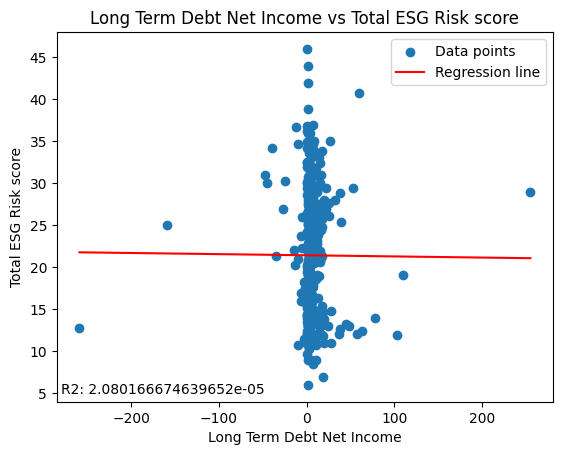

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.scatter(df[var1], df[var2], label="Data points")
plt.title(f"{var1} vs {var2}")
plt.xlabel(var1)
plt.ylabel(var2)

model = LinearRegression()
model.fit(df[[var1]], df[var2])

x_values = np.linspace(df[var1].min(), df[var1].max(), 100)
y_values = model.predict(x_values.reshape(-1, 1))
plt.plot(x_values, y_values, color='red', label="Regression line")

slope, intercept, r_value, p_value, std_err = linregress(df[var1], df[var2])
r_squared = r_value**2
print(f'R-squared value: {r_squared}')

# Display the plot
plt.text( -280, 5,f'R2: {r_squared}')
plt.legend()
plt.show()